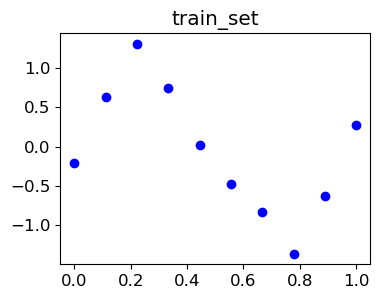

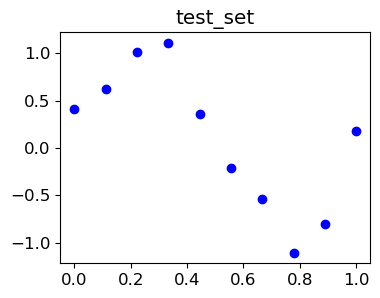

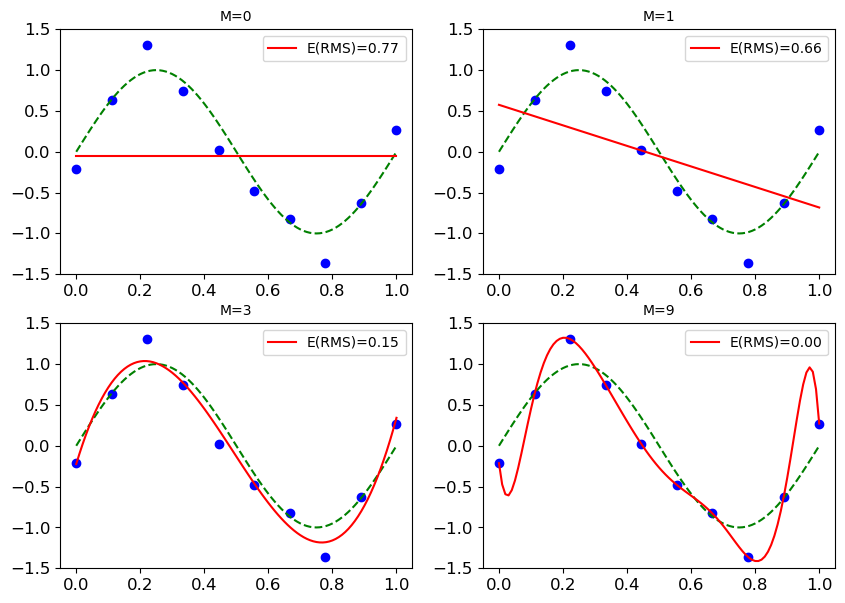

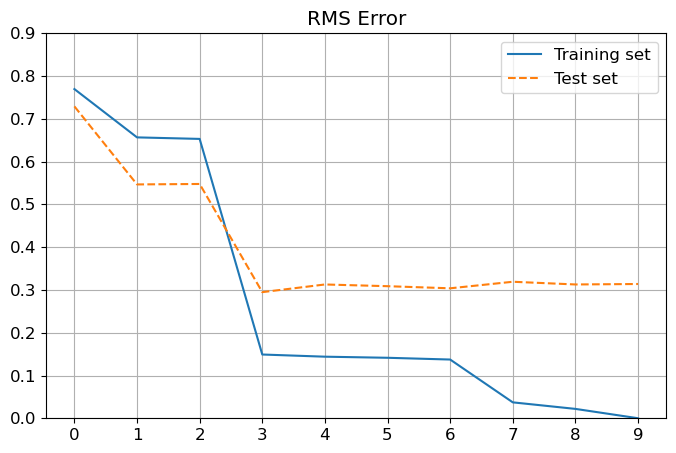

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

import matplotlib
matplotlib.rcParams['font.size'] = 12

import warnings
warnings.filterwarnings('ignore')


# データセット {x_n,y_n} (n=1...num) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x, y], index=['x', 'y']),
                                 ignore_index=True)
    return dataset
     
N=10          
train_set = create_dataset(N)
fig = plt.figure(figsize=(4, 3))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_title("train_set")
plt.scatter(train_set.x, train_set.y, marker='o', color='blue')
test_set = create_dataset(N)
fig = plt.figure(figsize=(4, 3))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_title("test_set")
plt.scatter(test_set.x, test_set.y, marker='o', color='blue')


# 最小二乗法で解を求める
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0, m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi, p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return f
     

# 平方根平均二乗誤差（Root mean square error）を計算
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

def show_result(subplot, train_set, m):
    f = resolve(train_set, m)
    subplot.set_xlim(-0.05, 1.05)
    subplot.set_ylim(-1.5, 1.5)
    subplot.set_title("M=%d" % m, fontsize=10)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o',
                    color='blue', label=None)

    # 真の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1, fontsize=10)
    
fig = plt.figure(figsize=(10, 7))
for i, m in enumerate([0, 1, 3, 9]):
    subplot = fig.add_subplot(2, 2, i+1)
    show_result(subplot, train_set, m)

# トレーニングセットとテストセットでの誤差の変化を表示
def show_rms_trend(train_set, test_set):
    df = DataFrame(columns=['Training set', 'Test set'])
    for m in range(0,10):   # 多項式の次数
        f = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(
                Series([train_error, test_error],
                        index=['Training set','Test set']),
                        ignore_index=True)
    df.plot(title='RMS Error', style=['-','--'], grid=True,
            xticks=range(0, 10), figsize=(8, 5), ylim=(0, 0.9))
     

show_rms_trend(train_set, test_set)
# 次数が3を超えるとテストセットに対する二乗誤差が減少しなくなる (オーバーフィッティングの検出)

In [ ]:
# データ数を増やした場合 平方根平均二乗誤差が約0.3で一定になる 本質的に
N=100            
train_set = create_dataset(N)
test_set = create_dataset(N)
     
